# Regresión lineal simple en Python

## El paquete statsmodel para regresión lineal

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_sales = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data_sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf

In [5]:
lm = smf.ols(formula = "Sales~TV", data = data_sales).fit()

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería
Sales =  7.032594 + 0.047537 * TV

In [7]:
# Los P valores son tan pequeños que podemos garantizar que no son 0
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
# R2
lm.rsquared

0.6118750508500712

In [9]:
# R2
lm.rsquared_adj

0.6099148238341625

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.47e-42
Time:                        14:35:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import matplotlib.pyplot as plt
plt.plot(data_sales["TV"], data_sales["Sales"], "ro")

In [12]:
data_sales["Sales_pred"] = lm.predict(pd.DataFrame(data_sales["TV"]))
data_sales.head()

,TV,Radio,Newspaper,Sales,Sales_pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


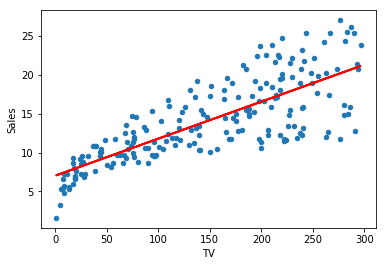

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
data_sales.plot(kind = "scatter", x= "TV", y="Sales")
plt.plot(data_sales["TV"], data_sales["Sales_pred"], c="red", linewidth = 2)

In [14]:
SSD = sum((data_sales["Sales"] - data_sales["Sales_pred"])**2)

In [15]:
SSD

2102.530583131351

In [16]:
RSE = np.sqrt(SSD/len(data_sales)-2)
RSE

2.917645097618412

In [17]:
error = RSE / np.mean(data_sales["Sales"])
error

0.20806882493267329

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

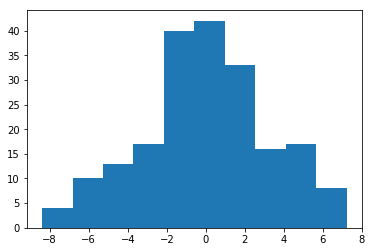

In [18]:
plt.hist(data_sales["Sales"] - data_sales["Sales_pred"])

# Regresión lineal múltiple en Python

## El paquete statsmodel para regresión múltiple
* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV+Newspaper
* Sales ~ TV+Radio
* Sales ~ Newspaper+Radio
* Sales ~ TV+Newspaper+Radio

In [19]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data_sales).fit()

In [20]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [21]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948 + 0.046901TV + 0.044219Newspaper

In [22]:
lm2.rsquared

0.6458354938293271

In [23]:
lm2.rsquared_adj

0.6422399150864777

In [24]:
data_sales["Sales_pred2"] = lm2.predict(data_sales[["TV", "Newspaper"]])

In [25]:
data_sales.head()

,TV,Radio,Newspaper,Sales,Sales_pred,Sales_pred2
0,230.1,37.8,69.2,22.1,17.970775,19.626901
1,44.5,39.3,45.1,10.4,9.147974,9.856348
2,17.2,45.9,69.3,9.3,7.850224,9.646055
3,151.5,41.3,58.5,18.5,14.234395,15.467318
4,180.8,10.8,58.4,12.9,15.627218,16.837102


In [26]:
SSD = sum((data_sales["Sales"]-data_sales["Sales_pred2"])**2)
SSD

1918.5618118968273

In [27]:
RSE = np.sqrt(SSD/(len(data_sales)-3))
RSE

3.120719860252885

In [28]:
error = RSE / np.mean(data_sales["Sales"])
error

0.22255089037282116

In [29]:
lm2.summary()

#Conclusión añadir el periodico no da una gran mejora

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           3.95e-45
Time:                        14:35:39   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#Añadir el Newspaper al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data_sales).fit()
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [31]:
data_sales["Sales_pred3"] = lm3.predict(data_sales[["TV", "Radio"]])

In [32]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           4.83e-98
Time:                        14:35:39   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data_sales.head()

,TV,Radio,Newspaper,Sales,Sales_pred,Sales_pred2,Sales_pred3
0,230.1,37.8,69.2,22.1,17.970775,19.626901,20.555465
1,44.5,39.3,45.1,10.4,9.147974,9.856348,12.345362
2,17.2,45.9,69.3,9.3,7.850224,9.646055,12.337018
3,151.5,41.3,58.5,18.5,14.234395,15.467318,17.617116
4,180.8,10.8,58.4,12.9,15.627218,16.837102,13.223908


In [34]:
SSD = sum((data_sales["Sales"]-data_sales["Sales_pred3"])**2)
RSE = np.sqrt(SSD/(len(data_sales)-3))
error = RSE / np.mean(data_sales["Sales"])
error

0.1199045043685506

In [35]:
#Añadir el Newspaper al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data_sales).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        14:35:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
data_sales["Sales_pred4"] = lm4.predict(data_sales[["TV", "Radio", "Newspaper"]])
SSD = sum((data_sales["Sales"]-data_sales["Sales_pred4"])**2)
RSE = np.sqrt(SSD/(len(data_sales)-4))
error = RSE / np.mean(data_sales["Sales"])
error

0.12020041885646238

In [37]:
data_sales.head()

,TV,Radio,Newspaper,Sales,Sales_pred,Sales_pred2,Sales_pred3,Sales_pred4
0,230.1,37.8,69.2,22.1,17.970775,19.626901,20.555465,20.523974
1,44.5,39.3,45.1,10.4,9.147974,9.856348,12.345362,12.337855
2,17.2,45.9,69.3,9.3,7.850224,9.646055,12.337018,12.307671
3,151.5,41.3,58.5,18.5,14.234395,15.467318,17.617116,17.597830
4,180.8,10.8,58.4,12.9,15.627218,16.837102,13.223908,13.188672


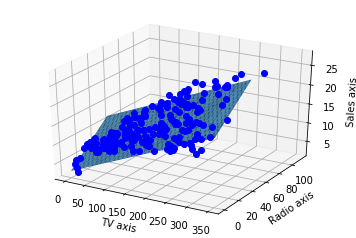

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

params = lm3.params.tolist()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('TV axis')
ax.set_ylabel('Radio axis')
ax.set_zlabel('Sales axis')
ax.plot(data_sales["TV"],data_sales["Newspaper"],data_sales["Sales"], "bo")

normal = np.array([params[1], params[2], 1])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = params[0]

# create x,y
xx, yy = np.meshgrid(range(350), range(50))

# calculate corresponding z
z = (normal[0] * xx + normal[1] * yy + d) * 1. /normal[2]

# plot the surface
ax.plot_surface(xx, yy, z)

## Multicolinealidad
#### Factor de Inflación de la Varianza
VIF = Factor de inflación de la varianza: cuantifica la intensidad de la multicolinealidad 
en un análisis de regresión normal de mínimos cuadrados

* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

In [47]:
# Newspaper - TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data_sales).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [48]:
# TV - Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data = data_sales).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [51]:
# Radio - TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data = data_sales).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

In [52]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           4.83e-98
Time:                        15:44:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""